# 03 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `03_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_03` folder, in which you create another folder called `data`
4. Copy paste the notebook `03_Homework` from the lectures repo to the working-folder. Copy the csv files `movies.csv` and `movies_metadata.csv` into the `working-folder/Session_03/data` directory.
5. Do the exercises on 03_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 21st 08:59 am CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## 1. Exploration and data cleaning (6 points)

**1.1. Read the dataset `movies.csv` and visualise it**

In [139]:
# Import the pandas
import pandas as pd

In [140]:
# Read and visualise the dataset
df = pd.read_csv("./data/movies.csv")
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


**1.2 Display the size and the number of missing data points per column of the DataFrame**

In [141]:
# What is the size of the dataset?
df.shape

(9999, 9)

In [142]:
# Get a summary of missing data (number of missing values) per column
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

**1.3 Fill the NaN and replace the original dataset**
- YEAR: 'Unknown'
- GENRE: 'Unknown'
- RATING: with the median value
- VOTES: 0

We leave the NaN of RunTime and Gross for now, as there is no straightforward way to fill them.

In [143]:
# Make a deep copy of the original data frame
data = df.copy(deep=True)

In [144]:
# First calculate the median rating over the column "RATING" (excluding the NA values)
median_rating = df['RATING'].median()
print(median_rating)

7.1


In [145]:
# Replace the NA values in the different columns by the respective general value 
# YEAR: 'Unknown', GENRE: 'Unknown', RATING: median value, VOTES: 0
data.fillna({'YEAR': 'Unknown', 'GENRE': 'Unknown', 'RATING': median_rating, 'VOTES': 0}, inplace=True)

In [146]:
# Verify if replacement operations were successful
data.isnull().sum()

MOVIES         0
YEAR           0
GENRE          0
RATING         0
ONE-LINE       0
STARS          0
VOTES          0
RunTime     2958
Gross       9539
dtype: int64

**1.4 Drop the duplicated rows**

In [147]:
# Drop the duplicates
data.drop_duplicates(inplace= True)

In [148]:
# Verify
print(data.shape[0], df.shape[0])

9568 9999


**1.5 Replace the columns names to make them all lowercase**

In [149]:
# Replace column names to make them all lowercase
data.columns = data.columns.str.lower()

In [150]:
# Verify
data

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",7.1,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,0,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.1,\nAdd a Plot\n,\n,0,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.1,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,0,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.1,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,0,NaN,NaN


**1.6 Convert the `votes` column into a `float type`**

*Hint: the U.K. and U.S. use a comma to separate groups of thousands. You might need to remove this comma first before converting the numbers*

In [151]:
# Remove commas from the votes column and convert to float
data['votes'] = data['votes'].str.replace(',', '').astype(float)

In [152]:
# Verify
print(data.dtypes)

movies       object
year         object
genre        object
rating      float64
one-line     object
stars        object
votes       float64
runtime     float64
gross        object
dtype: object


## 2. Descriptive statistics (5 points)

In [153]:
# Install matplotlib package
!pip install matplotlib

In [154]:
# Import the matplotlib package
import matplotlib.pyplot as plt

**2.1 What is the average rating?**

In [155]:
print(data['rating'].mean())

6.94608068561873


**2.2 What is the maximum runtime?**

In [156]:
print(data['runtime'].max())

853.0


**2.3 Filter the dataset to show which movie/serie has the longest runtime**

In [157]:
# Find the movie with the longest runtime
data.iloc[data['runtime'].idxmax()]

movies                               El tiempo entre costuras
year                                              (2013–2014)
genre                 \nAdventure, Drama, History            
rating                                                    8.3
one-line    \nSira Quiroga is a young Spanish dressmaker e...
stars       \n            \n    Stars:\nAdriana Ugarte, \n...
votes                                                  3876.0
runtime                                                 853.0
gross                                                     NaN
Name: 1902, dtype: object

**2.4 Plot the histogram of runtimes, filtering on (0, 200) range with 200 bins**

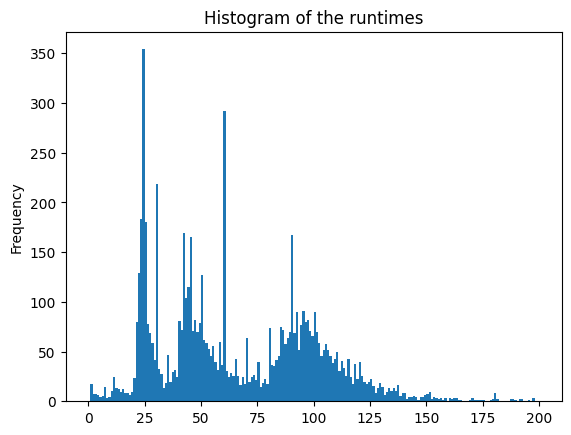

In [173]:
# Plot the runtime histogram filtering the data to a range between 0 and 200 as well as restricting it to 200 bins
data.runtime.plot(kind='hist', title="Histogram of the runtimes", range=(0, 200), bins=200);

**2.5 What is the number of votes a movie needs to have, to be in the top 10% most voted film?**

*Tip: the 90th quantile*

In [159]:
# What number of votes does a movie need to have, to be in the top 10% most voted films?
top_10_percent_votes = data['votes'].quantile(0.90)
print(f"A movie needs {top_10_percent_votes} votes to be in the top 10% most voted films.")

A movie needs 22193.100000000035 votes to be in the top 10% most voted films.


## 3. Merging datasets (4 points)

**Read `movies_metadata.csv` and assign it to a `df_meta` variable**

**Create a `merge_df` DataFrame from an `inner join` between `df` and `df_meta`**

*Hint: you need to find the right key to join on*

In [160]:
# Read the CSV and assign it to a variable
df_meta = pd.read_csv("./data/movies_metadata.csv", low_memory=False)

In [162]:
# Check the colums of the new data frame
df_meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [170]:
# Option 1: Merging data (cleaned version of df) with df_meta through the columns "movies" (data) and "title" (df_meta)
merge_df1 = data.merge(df_meta, how="inner", left_on="movies", right_on="title")
merge_df1

,movies,year,genre,rating,one-line,stars,votes,runtime_x,gross,adult,...,release_date,revenue,runtime_y,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN,False,...,1995-02-24,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Surviving the streets was just a rehearsal.,The Walking Dead,False,6.6,4.0
1,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN,False,...,1936-03-14,0.0,66.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,HE DIED a man with a hunger to love... and ret...,The Walking Dead,False,6.6,14.0
2,Lucifer,(2016–2021),"\nCrime, Drama, Fantasy",8.1,\nLucifer Morningstar has decided he's had eno...,"\n \n Stars:\nTom Ellis, \nLesle...",264222.0,42.0,NaN,False,...,2014-10-22,0.0,108.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Lucifer,False,5.8,4.0
3,The Good Doctor,(2017– ),\nDrama,8.1,"\nShaun Murphy, a young surgeon with autism an...","\n \n Stars:\nFreddie Highmore, ...",70871.0,41.0,NaN,False,...,2011-01-01,5206.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Do no harm.,The Good Doctor,False,5.0,52.0
4,Supernatural,(2005–2020),"\nDrama, Fantasy, Horror",8.4,\nTwo brothers follow their father's footsteps...,"\n \n Stars:\nJared Padalecki, \...",404273.0,44.0,NaN,False,...,1933-05-12,0.0,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Supernatural,False,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,Connected,Unknown,\nDocumentary,7.1,\nExploring the intricate and surprising conne...,\n \n Star:\nLatif Nasser\n,NaN,NaN,NaN,False,...,2008-09-25,0.0,110.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,NaN,Connected,False,7.0,20.0
1742,How to Win the US Presidency,(2016),\nDocumentary,6.2,\nThis whimsical look at rough-and-tumble Amer...,\n Director:\nCal Seville\n| \n Stars:\n...,127.0,50.0,NaN,False,...,2016-08-01,0.0,50.0,[],Released,NaN,How to Win the US Presidency,False,0.0,0.0
1743,Curtain,Unknown,Unknown,7.1,\nA female nurse escaping traumatic events who...,\n Director:\nMohamed Alsalman\n,NaN,NaN,NaN,False,...,2015-11-19,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Curtain,False,5.4,8.0
1744,Metro,(2008),\nDrama,7.1,\nThe dark heart of the city is the setting fo...,\n Director:\nChristopher Dorrah\n| \n S...,NaN,120.0,NaN,False,...,1997-01-16,31987563.0,117.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,San Francisco's top police hostage negotiator ...,Metro,False,5.3,136.0


In [165]:
# Option 2: Merging data (cleaned version of df) with df_meta through the columns index (data) and "id" (df_meta)

# First: convert 'id' column to int using .loc
df_meta.loc[:, 'id'] = pd.to_numeric(df_meta['id'], errors='coerce')
df_meta = df_meta[df_meta['id'].notna()]
df_meta.loc[:, 'id'] = df_meta['id'].astype(int)

In [169]:
# Second: Merge the two data frames
merge_df2 = data.merge(df_meta, how="inner", left_on=data.index, right_on="id")
merge_df2

,movies,year,genre,rating,one-line,stars,votes,runtime_x,gross,adult,...,release_date,revenue,runtime_y,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN,False,...,1988-10-21,0.0,69.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Released,NaN,Ariel,False,7.1,44.0
1,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414849.0,23.0,NaN,False,...,1986-10-16,0.0,76.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Shadows in Paradise,False,7.1,35.0
2,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...",25858.0,50.0,NaN,False,...,1995-12-09,4300000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,6.5,539.0
3,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,5283.0,110.0,NaN,False,...,1993-10-15,12136938.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,False,6.4,79.0
4,Lucifer,(2016–2021),"\nCrime, Drama, Fantasy",8.1,\nLucifer Morningstar has decided he's had eno...,"\n \n Stars:\nTom Ellis, \nLesle...",264222.0,42.0,NaN,False,...,1977-05-25,775398007.0,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,False,8.1,6778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,The Last Kingdom,(2015– ),"\nAction, Drama, History",7.1,\nAdd a Plot\n,\n,NaN,NaN,NaN,False,...,2006-12-15,144000000.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Something unexpected, unbelievable, unforgetta...",Charlotte's Web,False,5.8,300.0
3541,The Last Kingdom,(2015– ),"\nAction, Drama, History",7.1,\nAdd a Plot\n,\n Director:\nAnthony Philipson\n,NaN,NaN,NaN,False,...,2005-01-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Headspace,False,4.9,12.0
3542,Totenfrau,(2022– ),"\nDrama, Thriller",7.1,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN,False,...,2005-07-19,0.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The past is right here,Little Fish,False,5.9,25.0
3543,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.1,\nAdd a Plot\n,\n,NaN,NaN,NaN,False,...,2000-09-06,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,How you gonna win?,Turn It Up,False,5.0,5.0
